**Цель этого проекта**: исследовать возможности расширения иснструментария анализа фильмов как текстов культуры за счёт применения нейросети на основе библиотеки Phyton 3.6+ *Dostoevsky* для анализа критики и отзывов. Проект основан на моей ВКР на тему "Женские образы «культурного героя» в современном массовом кинематографе",защищённой в 2021 г. в МГЛУ (Москва)

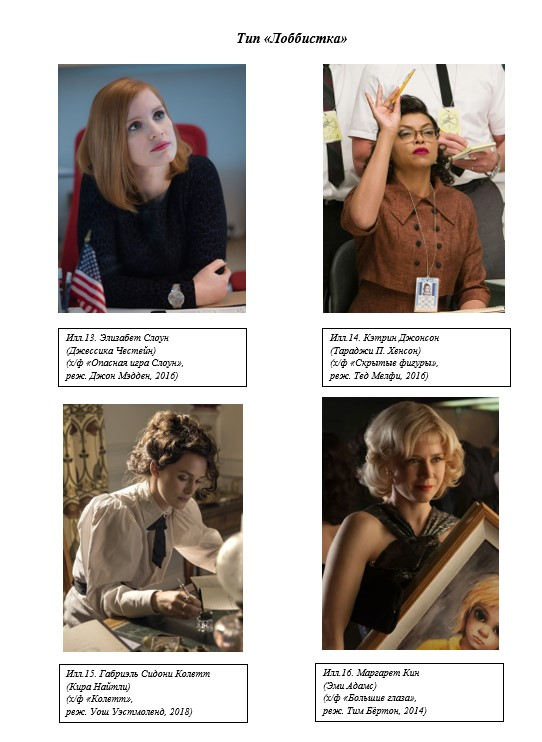

Библиотека *Dostoevsky* - это библиотека для обработки естественного языка, которая анализирует тональность, т.е. эмоциональную окрашенность текста. Обучение сети мы производим на базе Sentiment — набора аннотированных данных из ВКонтакте. Библиотека позволяет определять следующие типы высказываний:


*   **positive** -- положительно окрашенные;
*   **negative** -- отрицательно окрашенные;
*   **neutral** -- нейтрально окрашенные;
*   **speech** -- разговорные фразы, не имеющие окраски;
*  **skip** -- фразы, тональность которых по тем или иным причинам не может быть определена.

Наша задача -- сделать предположения о возможности использования нейросети на основе Dostoevsky для анализа различных высказываний, написать алгоритм и затем протестировать его для проверки первоначальной гипотезы. В качестве материала для тестирования алгоритма возьмём 2 высказывания о фильме "Колетт" (реж. Уош Уэстмоленд, 2018) с сайта Кинопоиск: рецензию критика Галины Иванкиной и отзыв пользователя odemenkova2609.
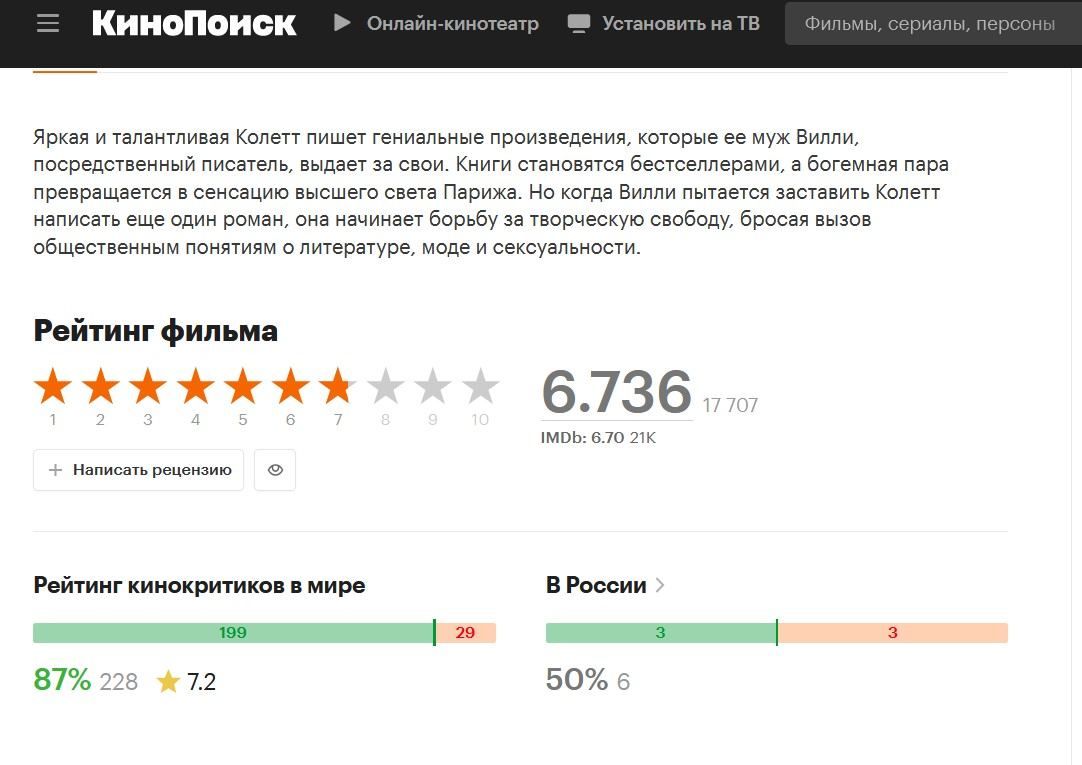

**Гипотеза:** Нейросеть можно настроить для распознавания эмоциональной окрашенности текста, но точность будет низкой.

In [ ]:
#устанавливаем библиотеку и RuSentiment
!pip install dostoevsky
!python3 -m dostoevsky download fasttext-social-network-model



In [ ]:
#импортируем всё необходимое из библиотеки
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel 

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel (tokenizer=tokenizer)

In [ ]:
#открываем файл, в который предварительно записали текст рецензии, выводим содержимое.
file1 = open("text1.txt","r")
print(*file1)

Премьера «Колетт» (2018) с Кирой Найтли в главной роли — это два часа густого феминистского вздора в изящной упаковке. Не будет спойлером, то бишь раскрытием всех тайн сюжета, если даже пересказать кадр за кадром: история одной из самых значительных французских писательниц начала XX века хорошо известна и многажды препарирована. Жанр байопик — не более чем набор иллюстраций в книге жизни, и вопрос не в том, какие именно картинки ставить — важны подписи к ним. Соль. Интерпретация. Кинобиография популярного лица — это всегда зеркало современности. Об одном и том же человеке под разными углами снимут в 1930-х, 1960-х и — в наши дни. Расцветят и явят не то, что выпячивали раньше. И — напротив — завуалируют нечто великое, если оно - это «великое» представляется пустым и отжившим.
 Сейчас принято везде пихать (пристойного глагола я не подберу) тему феминизма и угнетения женщин. В ходу стандартная фабула: жила-была девочка, яркая и талантливая, но никто её не замечал — все только и жаждали по

In [105]:
#разбиваем текст рецензии из файла на предложения, используя модуль re.
import re
def_data1 = '''Премьера «Колетт» (2018) с Кирой Найтли в главной роли — это два часа густого феминистского вздора в изящной упаковке. Не будет спойлером, то бишь раскрытием всех тайн сюжета, если даже пересказать кадр за кадром: история одной из самых значительных французских писательниц начала XX века хорошо известна и многажды препарирована. Жанр байопик — не более чем набор иллюстраций в книге жизни, и вопрос не в том, какие именно картинки ставить — важны подписи к ним. Соль. Интерпретация. Кинобиография популярного лица — это всегда зеркало современности. Об одном и том же человеке под разными углами снимут в 1930-х, 1960-х и — в наши дни. Расцветят и явят не то, что выпячивали раньше. И — напротив — завуалируют нечто великое, если оно - это «великое» представляется пустым и отжившим.
 Сейчас принято везде пихать (пристойного глагола я не подберу) тему феминизма и угнетения женщин. В ходу стандартная фабула: жила-была девочка, яркая и талантливая, но никто её не замечал — все только и жаждали поработить бедняжку, навязать постылое замужество и, как водится, унизить. Буркнуть эдак свысока: «Милое создание! Куда ты карабкаешься? Надевай корсет и панталоны оттенка «розы Фонтенбло», вышивай крестиком, поливай фикус». Тебе — розы, мужикам — паровозы. До кучи — пароходы, телеграф, телефон, мосты и банки. В смысле — кредитные учреждения. Твои же банки — с малиновым вареньем. Но девочка взяла и ...разозлилась! — она запустила ту банку в голову супруга и пошла изобретать велосипед.
 За последние пять лет было выпущено сразу несколько подобных картин, самая значительная из которых - «Большие глаза» (2014) Тима Бёртона - о художнице Маргарет Кин, вынужденной долго мириться с тем, что гадюка-муж выдавал её произведения за свои. «Колетт» Уоша Уэстморленда — из той же слёзовыжимательной серии. Несправедливости и кошмары женского бытия! О том, как умненькая Габриэль-Сидони Колетт подневольно строчила бестселлеры, тогда как славу и дивиденды получал её супруг Анри-Готье Виллар, «Вилли»— человек малых способностей, зато — бонвиван, кутила и дамский угодник. Прелюбопытная деталь: в России книги Колетт начали выходить в 1900-х годах, с именем Вилара на обложке. В те годы мадам ещё не отсудила у своего благоверного авторские права на «Клодин в школе», «Клодин в Париже» и прочие творения.
 Надо признать, что создатели фильма отлично передали настроение времени, но чересчур нарочито явили своё знание атрибутов и антуража. Иногда это смешно, хотя и в целом похвально. Возникает разговор об электрическом освещении и его преимуществах. И тут же — о главном недостатке. Разумеется, немолодая леди говорит о беспощадности электроламп (тогда многие фельетонисты обыгрывали ситуацию, в которой сорокалетняя кокетка при свечах выглядела молодой и свежей, а поэтому наотрез отказывалась ездить в те дома, где есть коварная лампочка Эдисона). Другая из героинь, показывая новую мебель, произносит: стиль Ар Нуво. Зрителя как бы водят по музею, но при этом — подгоняют: там ещё много всяких штук и штучек! Далее? Велосипед, автомобиль, Мулен-Руж, канкан. Вопрос: «Нравится ли вам Эйфелева башня?» Мы наблюдаем ожившие картины Ренуара, Дега, Тулуз-Лотрека и того салонного любимца, который творил под именем Джеймса Тиссо. Это делали уже много раз, начиная с кубриковского «Барри Линдона» (1975), однако же, ходить проверенными тропами — вовсе не грех. В одной из сцен обыграна вещь Жана Беро «Шале велосипедистов в Булонском лесу», а потому для знатоков Прекрасной Эпохи (или — Серебряного века) этот фильм — настоящий подарок. Вернее — ребус. Бесит расстановка сил и базовый посыл? Ну так — угадывай виды Камиля Писсарро и силуэты причёсок такого-то года. А шика здесь и правда много, равно, как и той мучительной двойственности, которую переживала Belle Époque.
 Прекрасную Эпоху по праву именуют «эпохой красавиц». Никогда – ни до, ни после женщины не были так обворожительны. Журналы наперебой предлагали отбеливающие кремы и ароматную пудру, тугие атласные корсеты и краску для «стойкого колера brunet». Уайльдовский лорд Генри цинично изрекал: «Женщины не бывают гениями. Они – декоративный пол. Женщина – это воплощение торжествующей над духом материи». Любование женщиной – это восторг перед роскошной лилией, явившей себя миру с одной – единственной целью – обвораживать зрителя. Отсюда сравнение тонкого стана - со стеблем, высоко поднятой головы в шляпке – с головкой цветка, а запаха духов – с дуновением ночного ветра в садах Исфахана. «Ваше платье изысканно, ваша тальма лазорева…», - писал денди и капризник Игорь Северянин.
 Эталон красоты – женщина-цветок, нежная, слабая, волнующая. Недаром, излюбленный мотив дизайнеров тех лет – растение. Вместе с тем, дамы принялись активно осваивать такие виды досуга, как игра в теннис, плавание и велоспорт. Развитие промышленности, медицины, образования и — техники вызвало к жизни спрос на женскую рабсилу. Если раньше хватало мужчин, то теперь подключились и напудренные «цветочки» — они сделались конторскими служащими, телефонистками, фельдшерицами, и посему уже не могли довольствоваться ролью жён и матерей. Истерические суфражистки тут ни при чём — всё «сделала» экономика. Та же Колетт изрекла: «Женские и мужские возможности примерно равны. Лишь в туалетной комнате положение различается». Кроме того, появился особый дамский типаж - «демоническая фемина», высмеянная и французскими острословами, и нашей русской Тэффи: «Общественное положение демоническая женщина может занимать самое разнообразное, но большею частью она – актриса». Колетт, между прочим, была ещё и знаменитой, а потом и скандальной актрисой, отвечая всем требованиям, означенным в фельетоне. Но — об этом чуть позже.
 Итак, молодая и резвая провинциалка выходит замуж за богемного мота Виллара, переезжает с ним в Париж и буквально с первых же дней становится жертвой измен, предательств и бытового хамства. Нам показывают мужчину с самой непрезентабельной и — более того — омерзительной стороны. Так, он громко портит воздух, не озаботившись чувствами (особливо - обонянием!) юной супруги. Мочится при ней — к счастью, хотя бы развернувшись к зрителю задом. Он некрасиво дрыхнет и столь же уродливо ест! Это очень грубые, физиологичные маркеры. Скотские тавро. Виллар (читай — существо в штанах, мужик) должен вызывать у зрителя шквальное омерзение, а не лёгенькую досаду, что такое мелкотравчатое существо копошилось рядом с Колетт. Не токмо смердит, но и поступает он — гадко. В долгах, как в шелках, а дорогостоящих куртизанок посещает регулярно. Кропать романы он не в состоянии - за него пашут «литературные негры», и даже стёкла его конторы — грязные, с разводами. Брутальненько! Нельзя не отметить, что британский актёр Доминик Уэст, играющий в театре чеховских и шекспировских персонажей, превосходно управился с заявленной ролью — мсье Виллар тошнотворен, чудовищен и подл, а на его вонючем (в прямом смысле) фоне кристальная Колетт выглядит, как последний шанс утопающего человечества. Они — на контрасте. Зрителю с первых же кадров ясно — с Вилларом ей не по пути. Разрыв неизбежен — ибо громадна пропасть.
 Вообще, особи мужеска пола здесь гнусны и бесполезны, как сорняки или паразиты. Зато женщины — чарующи, загадочны, полны мечтаний и дерзаний. Правда, не вполне целомудренны. Можно сказать, порочны, однако их мерзости рисуются, как что-то пикантное и — объяснимое. Мол, нас так замучили эти чудовища в котелках и фраках, что мы тут пускаемся во все тяжкие. Перед нами проходят самые различные образы — актриса Полэр, светская львица Матильда де Бельбёф, писательница Рашильд. Все они — по-своему борются с мужским шовинизмом, а госпожа де Бельбёф и вовсе предпочитает мужской пиджак, разглагольствуя о том, как ей было тесно и плохо в девчачьем платье, с косичками. Вещает она об этом с такой непередаваемой горечью, что становится не по себе — эк дамочку-то скрутило. Не всякий о веригах так скажет, как Матильда (или Мисси) — о юбочках и бантах. И всё - на фоне волшебно снятой природы, особняков, апартаментов.
 Кира Найтли, вот уже лет пятнадцать играющая в костюмных мелодрамах и экранизациях старой классики, будем честны, плохо монтируется и с фижмами галантного века, и с шемизом эры ампир, и заснеженными турнюрами Анны Карениной, но, тем не менее, из года в год мы созерцаем эту замечательную актрису в шляпках с баволетками и мантоньерками. Но в случае с «Колетт» попадание почти стопроцентное. Её персонаж — обладательница резких черт лица. О ней, как и о Полине Полэр или, допустим, об Иде Рубинштейн говорили: острая прелесть будущего столетия. Бытовал особенный спрос и на такой сорт внешности. Это не женщина-цветок, но - женщина-стилет. Ещё примет Белль Эпок? Вошла в моду древнеегипетская тема в её обывательском изводе — оттенок штофной ткани «воды Нила» и бульварное чтиво о любовниках царицы Хатшепсут. В фильме «Колетт» мы видим грандиозную и — претенциозную постановку в Мулен-Руж, где главная героиня танцует партию ожившей мумии. Точнее — божественной египтянки, разбуженной англичанином (его изображает маркиза де Бельбёф). Эти пышно-фараонские действа происходили тогда повсюду, а в России гремели «Египетские ночи» с Анной Павловой и Михаилом Фокиным, что, без сомнения выше, чем кабареточное вихляние мадам Колетт, но выполнено с тем же расчётом — изумить пряной экзотикой. В кадре — танцкласс, где Колетт, Мисси и ещё ряд статных «эмансипе» тренируются по системе Жак Далькроза — основателя ритмики, а по сути — родоначальника всего того, что ныне именуется «шейпинг». То были времена, когда человек судорожно хватался за всё новое и как напишет впоследствии Алексей Толстой: «Все жаждали и, как отравленные, припадали ко всему острому, раздирающему внутренности».
 Отдельно хочется похвалить костюмы, дизайн, оформление и, коли уж даны 1890-е годы, так это будут рукава-буфы, юбка схватывающая бёдра и — расходящаяся к низу, как цветок вьюнка (они даже именовались volubilis), а не фантазийное ретро. Проходит пять-шесть-десять лет — уже и рукава поуже, и шляпы — других фасонов. Если же резюмировать, то фильм «Колетт» - шикарный по форме и чудовищный по содержанию, а потому девушкам с неокрепшей гендерной ориентацией его лучше не смотреть.'''

data1_sent = re.split("\. |\.\.\. ", def_data1)
print(data1_sent)

['Премьера «Колетт» (2018) с Кирой Найтли в главной роли — это два часа густого феминистского вздора в изящной упаковке', 'Не будет спойлером, то бишь раскрытием всех тайн сюжета, если даже пересказать кадр за кадром: история одной из самых значительных французских писательниц начала XX века хорошо известна и многажды препарирована', 'Жанр байопик — не более чем набор иллюстраций в книге жизни, и вопрос не в том, какие именно картинки ставить — важны подписи к ним', 'Соль', 'Интерпретация', 'Кинобиография популярного лица — это всегда зеркало современности', 'Об одном и том же человеке под разными углами снимут в 1930-х, 1960-х и — в наши дни', 'Расцветят и явят не то, что выпячивали раньше', 'И — напротив — завуалируют нечто великое, если оно - это «великое» представляется пустым и отжившим.\n Сейчас принято везде пихать (пристойного глагола я не подберу) тему феминизма и угнетения женщин', 'В ходу стандартная фабула: жила-была девочка, яркая и талантливая, но никто её не замечал — вс

In [107]:
#анализируем предложения с использованием Dostoevsky
results = model.predict(data1_sent, k=2)
for message, sentiment in zip(data1_sent, results):
    print(message, sentiment)

Премьера «Колетт» (2018) с Кирой Найтли в главной роли — это два часа густого феминистского вздора в изящной упаковке {'neutral': 0.6442351341247559, 'skip': 0.18714269995689392}
Не будет спойлером, то бишь раскрытием всех тайн сюжета, если даже пересказать кадр за кадром: история одной из самых значительных французских писательниц начала XX века хорошо известна и многажды препарирована {'neutral': 0.7879412174224854, 'positive': 0.1097157895565033}
Жанр байопик — не более чем набор иллюстраций в книге жизни, и вопрос не в том, какие именно картинки ставить — важны подписи к ним {'neutral': 0.9525841474533081, 'skip': 0.07586817443370819}
Соль {'neutral': 1.0000100135803223, 'skip': 0.0004978571087121964}
Интерпретация {'neutral': 0.9450047016143799, 'positive': 0.1097157895565033}
Кинобиография популярного лица — это всегда зеркало современности {'neutral': 0.7606606483459473, 'skip': 0.21734751760959625}
Об одном и том же человеке под разными углами снимут в 1930-х, 1960-х и — в наши

Мы видим, что, хотя алгоритм работает, нейросеть в целом не справляется с анализом текста: на выходе очень много 'skip', многие эмоционально окрашенные слова идентифицируются как 'neutral'.

В чём причина неудачи? Моё предположение: в том, что наша бибилиотека обучалась на материале двнных из соцсети и пожтому не считывает обороты и слова, характерные для публицистики и прессы, а не для постов и комментариев. 

Проверим это предположение, проанализировав отзыв пользователя, который по специфике речи ближе к сетевой.

In [90]:
#производим все действия нашего алгоритма с файлом, в который записан отзыв интернет-пользователя
file2 = open('text2.txt', 'r')
print(*file2)


Увидев на экране трейлер к новому фильму «Колетт», в котором главную роль исполнила всеми любимая Кира Найтли, я приняла решение - обязательно пойти на него в кино! Прежде всего, для Киры это уже как своеобразное амплуа - девушки разных исторических эпох, чистые и невинные. Скажу сразу, что фильм не разочаровал, хотя многие увидели в нем темы феминизма, эмансипации, социального неравенства и тд... Если откинуть все эти предрассудки, мы получаем отличную экранизацию жизни знаменитой французской писательницы Колетт (Сидони-Габриэль Колетт), наполненную сложностями и внутренней борьбой. Такие фильмы не могу не мотивировать людей на собственные изменения и переосмысление действительности.
 Уверена, многие уже представляют себе сюжет фильма, поэтому останавливаться на этом нет смысла. Хотелось бы обратить внимание на центральную героиню картины - саму писательницу Колетт. Её бы путь я описала как «Сквозь тернии к звёздам». Некогда глупая и неопытная девушка, которая понятия не имеет, каких 

In [109]:
import re
def_data2 = '''Увидев на экране трейлер к новому фильму «Колетт», в котором главную роль исполнила всеми любимая Кира Найтли, я приняла решение - обязательно пойти на него в кино! Прежде всего, для Киры это уже как своеобразное амплуа - девушки разных исторических эпох, чистые и невинные. Скажу сразу, что фильм не разочаровал, хотя многие увидели в нем темы феминизма, эмансипации, социального неравенства и тд... Если откинуть все эти предрассудки, мы получаем отличную экранизацию жизни знаменитой французской писательницы Колетт (Сидони-Габриэль Колетт), наполненную сложностями и внутренней борьбой. Такие фильмы не могу не мотивировать людей на собственные изменения и переосмысление действительности.
 Уверена, многие уже представляют себе сюжет фильма, поэтому останавливаться на этом нет смысла. Хотелось бы обратить внимание на центральную героиню картины - саму писательницу Колетт. Её бы путь я описала как «Сквозь тернии к звёздам». Некогда глупая и неопытная девушка, которая понятия не имеет, каких сюрпризов ждать от жизни, за какие ниточки стоит дергать людей, чтобы правильно выстроить контакт с ними, со временем перерождается в сильную и уверенную женщину, способную вытерпеть любые упреки общества ради своего же счастья.
 Нельзя не отметить, что Колетт — творческая личность. Она пишет о том, что видит, о том, что чувствует. Такая комбинация способна родить шедевр. Героиня восхищается природой и очень тонко и красиво описывает её явления. Мы видим единство между человеком и окружающим миром, а такой акцент всегда привлекает меня в фильмах, жаль только, что мало кто из режиссеров акцентирует на этом внимание, несмотря на то, что в гармония с природой заложена в каждом из нас. Эта деталь служит отличным примером и неким «уроком» многим деятелям искусства, в том числе и писателям.
 Что же касается однополых отношений, я, честно говоря, до некоторого времени не изъявляла желание смотреть на подобные картины, но этот фильм перевернул во мне всё. Вспомним мелодраму «Горбатая гора», в которой режиссёр Энг Ли мастерски сумел передать любовные отношения между мужчинами, при этом фильм выглядел достойно, красиво и по-истине воодушевляющим. Точно так же и с «Колетт»: сдержанно и эстетично. По сути, выбор в пользу женщин в жизни героини является чуть ли не переломным моментом, ведь с тех пор, как она позволила своему сердцу управлять желаниями и не скрывать истинных наслаждений, её мировоззрение и взгляд на мир кардинально изменились.
 Ведь в конце- то концов, кто из нас не хочет быть счастливым? На протяжении всего фильма у меня ни разу не родилось суждение о том, что он напрочь пропитан суждениями о «феминизме», потому что я для себя определила основную цель этой картины - путь внутреннего перерождения женщины. И эта цель оправдала себя. Я думаю, не стоит упоминать о прекрасном антураже описываемой эпохи, ибо это и так видно с первых кадров!
 10 из 10'''

data2_sent = re.split("\. |\.\.\. ", def_data2)
print(data2_sent)

['Увидев на экране трейлер к новому фильму «Колетт», в котором главную роль исполнила всеми любимая Кира Найтли, я приняла решение - обязательно пойти на него в кино! Прежде всего, для Киры это уже как своеобразное амплуа - девушки разных исторических эпох, чистые и невинные', 'Скажу сразу, что фильм не разочаровал, хотя многие увидели в нем темы феминизма, эмансипации, социального неравенства и тд', 'Если откинуть все эти предрассудки, мы получаем отличную экранизацию жизни знаменитой французской писательницы Колетт (Сидони-Габриэль Колетт), наполненную сложностями и внутренней борьбой', 'Такие фильмы не могу не мотивировать людей на собственные изменения и переосмысление действительности.\n Уверена, многие уже представляют себе сюжет фильма, поэтому останавливаться на этом нет смысла', 'Хотелось бы обратить внимание на центральную героиню картины - саму писательницу Колетт', 'Её бы путь я описала как «Сквозь тернии к звёздам»', 'Некогда глупая и неопытная девушка, которая понятия не 

In [110]:
results = model.predict(data2_sent, k=2)
for message, sentiment in zip(data2_sent, results):
    print(message, sentiment)

Увидев на экране трейлер к новому фильму «Колетт», в котором главную роль исполнила всеми любимая Кира Найтли, я приняла решение - обязательно пойти на него в кино! Прежде всего, для Киры это уже как своеобразное амплуа - девушки разных исторических эпох, чистые и невинные {'neutral': 0.7057950496673584, 'positive': 0.11921291798353195}
Скажу сразу, что фильм не разочаровал, хотя многие увидели в нем темы феминизма, эмансипации, социального неравенства и тд {'neutral': 0.8706072568893433, 'negative': 0.22816647589206696}
Если откинуть все эти предрассудки, мы получаем отличную экранизацию жизни знаменитой французской писательницы Колетт (Сидони-Габриэль Колетт), наполненную сложностями и внутренней борьбой {'neutral': 0.59267657995224, 'negative': 0.1824355274438858}
Такие фильмы не могу не мотивировать людей на собственные изменения и переосмысление действительности.
 Уверена, многие уже представляют себе сюжет фильма, поэтому останавливаться на этом нет смысла {'neutral': 0.692651987

Мы видим, что на сей раз у нас почти нет случаев 'skip', и эмоциональная окраска в целом определяется верно, хотя бы частично.

Вывод: применение найросетей,в том числе на базе Dostoevsky, для анализа восприятия художественных произведений зрителями возможно. Однако необходимы более сложные обучающие системы, если мы хотим анализировать полноценные критические статьи в прессе.

Благодарю за внимание!

In [118]:
#RuSentiment coryright
'''inproceedings rogers-etal-2018-rusentiment'
    title = "{R}u{S}entiment: An Enriched Sentiment Analysis Dataset for Social Media in {R}ussian",
    author = "Rogers, Anna  and
      Romanov, Alexey  and
      Rumshisky, Anna  and
      Volkova, Svitlana  and
      Gronas, Mikhail  and
      Gribov, Alex",
    booktitle = "Proceedings of the 27th International Conference on Computational Linguistics",
    month = aug,
    year = "2018",
    address = "Santa Fe, New Mexico, USA",
    publisher = "Association for Computational Linguistics",
    url = "https://www.aclweb.org/anthology/C18-1064",
    pages = "755--763" '''

'inproceedings rogers-etal-2018-rusentiment\'\n    title = "{R}u{S}entiment: An Enriched Sentiment Analysis Dataset for Social Media in {R}ussian",\n    author = "Rogers, Anna  and\n      Romanov, Alexey  and\n      Rumshisky, Anna  and\n      Volkova, Svitlana  and\n      Gronas, Mikhail  and\n      Gribov, Alex",\n    booktitle = "Proceedings of the 27th International Conference on Computational Linguistics",\n    month = aug,\n    year = "2018",\n    address = "Santa Fe, New Mexico, USA",\n    publisher = "Association for Computational Linguistics",\n    url = "https://www.aclweb.org/anthology/C18-1064",\n    pages = "755--763" '